## Information Theory and Stochastic Processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ipywidgets import interactive, IntSlider
import ipywidgets as widgets

In [3]:
plt.style.use("../est.mplstyle")

In [4]:
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]

In [5]:
np.random.seed(42)

# Entropy

**Entropy**

In [6]:
def entropy(probabilities):
    return np.sum(-probabilities*np.log2(probabilities))

#### Bernoulli

In [7]:
def entropy_bernoulli(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [8]:
p1 = np.linspace(1e-3, 1-1e-3, 10**3)

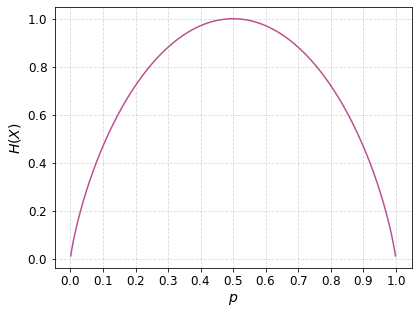

In [9]:
plt.plot(p1, entropy_bernoulli(p1), '-', color=colors[2], label="Bernoulli(p)")
plt.xlabel("$p$")
plt.ylabel("$H(X)$")
plt.xticks([i/10 for i in range(0, 11)])
plt.grid(alpha=0.5, linestyle='--')
plt.savefig('../figures/monograph/bernoulli-entropy.pdf')
plt.show()

## Weak Tipicality

Suppose we have an alphabet $\mathcal{X} = \{0, 1, 2, 3, 4\}$ of $k=5$ with probabilities $(0.3, 0.15, 0.15, 0.2, 0.2)$ and we draw $n$ samples of it.

In [10]:
symbols = list(range(5))

In [11]:
probs = np.array([0.3, 0.15, 0.15, 0.2, 0.2])

In [12]:
entropy(probs)

2.2709505944546686

In [13]:
sample = np.random.choice(symbols, p=probs, size=10)

In [14]:
def log_prob_sample(sample, probabilities=probs):
    return np.sum(np.log2(probabilities[sample]))

In [15]:
sample_lengths = np.arange(1, 10**3, 1)

In [16]:
entropies_estimates = []
for n in sample_lengths:
    sample = np.random.choice(symbols, p=probs, size=n)
    log_sample_prob = log_prob_sample(sample, probs)
    entropies_estimates.append(-log_sample_prob/n)

#### Time evolution

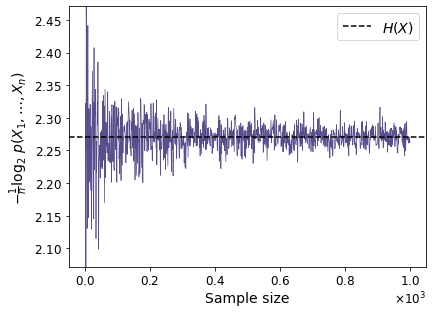

In [17]:
plt.plot(sample_lengths, entropies_estimates, '-', linewidth=0.7, color=colors[1])
plt.axhline(y=entropy(probs), linestyle='dashed', color='black', label="$H(X)$")
plt.ylim(entropy(probs)-0.2, entropy(probs)+0.2)
plt.xlabel("Sample size")
plt.ylabel(r"$-\frac{1}{n}\log_{2}\,\,p(X_1, \dots, X_n)$")
plt.legend()
plt.savefig("../figures/monograph/entropy-estimation-typicality.pdf")
plt.show()

#### Histogram

In [18]:
n = 100

In [19]:
epsilon = 0.05

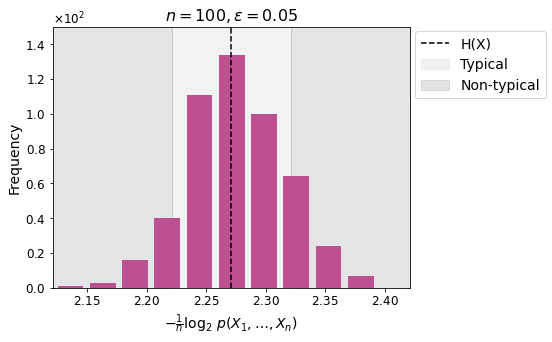

In [20]:
n_runs = 500
samples = [np.random.choice(symbols, p=probs, size=n) for i in range(n_runs)]
calculated_log2_probabilites = [-log_prob_sample(sample)/n for sample in samples]
plt.hist(calculated_log2_probabilites, bins=10, rwidth=0.8, color=colors[2])
plt.axvline(x=entropy(probs), color='k', linestyle='dashed', label='H(X)')
plt.xlim(entropy(probs)-0.15, entropy(probs)+0.15)
plt.xlabel(r"$-\frac{1}{n}\log_{2}\,\,p(X_1, \dots, X_n)$")
plt.ylabel("Frequency")
plt.ylim(0, 150)
plt.title(r"$n = 100, \varepsilon = 0.05$")
ax = plt.gca()
ax.fill_between(np.linspace(entropy(probs)-epsilon, entropy(probs)+epsilon), 0, 150, color='grey', alpha=0.1, label="Typical")
ax.fill_between(np.linspace(entropy(probs)+epsilon, entropy(probs)+0.15), 0, 150, color='black', alpha=0.1)
ax.fill_between(np.linspace(entropy(probs)-0.15, entropy(probs)-epsilon), 0, 150, color='black', alpha=0.1, label="Non-typical")
plt.legend(bbox_to_anchor=(1.4, 1.01))
plt.savefig("../figures/monograph/typicality-n100.pdf", bbox_inches='tight')
plt.show()

In [21]:
n = 500

In [22]:
epsilon = 0.05

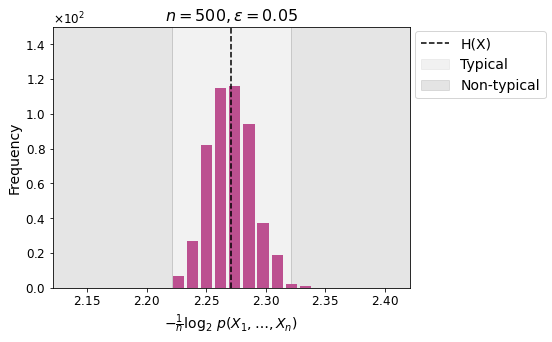

In [23]:
n_runs = 500
samples = [np.random.choice(symbols, p=probs, size=n) for i in range(n_runs)]
calculated_log2_probabilites = [-log_prob_sample(sample)/n for sample in samples]
plt.hist(calculated_log2_probabilites, bins=10, rwidth=0.8, color=colors[2])
plt.axvline(x=entropy(probs), color='k', linestyle='dashed', label='H(X)')
plt.xlim(entropy(probs)-0.15, entropy(probs)+0.15)
plt.xlabel(r"$-\frac{1}{n}\log_{2}\,\,p(X_1, \dots, X_n)$")
plt.ylabel("Frequency")
plt.ylim(0, 150)
plt.title(r"$n = 500, \varepsilon = 0.05$")
ax = plt.gca()
ax.fill_between(np.linspace(entropy(probs)-epsilon, entropy(probs)+epsilon), 0, 150, color='grey', alpha=0.1, label="Typical")
ax.fill_between(np.linspace(entropy(probs)+epsilon, entropy(probs)+0.15), 0, 150, color='black', alpha=0.1)
ax.fill_between(np.linspace(entropy(probs)-0.15, entropy(probs)-epsilon), 0, 150, color='black', alpha=0.1, label="Non-typical")
plt.legend(bbox_to_anchor=(1.4, 1.01))
plt.savefig("../figures/monograph/typicality-n1000.pdf", bbox_inches='tight')
plt.show()

#### Animation

In [24]:
def animate_hist(n):
    n_runs = 500
    samples = [np.random.choice(symbols, p=probs, size=n) for i in range(n_runs)]
    calculated_log2_probabilites = [-log_prob_sample(sample)/n for sample in samples]
    plt.hist(calculated_log2_probabilites, bins=10, rwidth=0.8, color=colors[2])
    plt.axvline(x=entropy(probs), color='k', linestyle='dashed', label='H(X)')
    plt.xlim(entropy(probs)-0.15, entropy(probs)+0.15)
    plt.xlabel(r"$-\frac{1}{n}\log_{2}\,\,p(X_1, \dots, X_n)$")
    plt.ylabel("Frequency")
    plt.ylim(0, 150)
    plt.show()
    

In [25]:
interactive_plot = interactive(animate_hist, n=IntSlider(min=5, max=800, step=1,continuous_update=False, description=r'$n$'))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=5, continuous_update=False, description='$n$', max=800, min=5), Output(l…

## Data Compression

#### Shannon coding

In [26]:
class ShannonEncoder:
    
    def __init__(self, prob):
        self.prob = prob
        self.prob_order = np.argsort(self.prob)[::-1]
        self.lengths = -np.log2(prob).astype(np.int32)
            
    
    def _codeword_(self, idx):
        prob = np.sum(self.prob[self.prob_order][:idx])
        binary = ''
        length = self.lengths[self.prob_order][idx]
        while length:
            prob *= 2
            bit = int(prob)
            if bit == 1:
                prob -= 1
                binary += '1'
            else:
                binary += '0'
            length -= 1
        return binary
    
    
    def get_codewords(self):
        size = self.lengths.size
        codewords = np.zeros(size, dtype='object')
        for i in range(0, size):
            codewords[i] = self._codeword_(i)
        codewords = codewords[self.prob_order]        
        return codewords
    

#### Shannon code lengths

In [27]:
def shannon_code_lengths(probabilities):
    return np.ceil(-np.log2(probabilities))

#### Expected code length

In [28]:
def expected_code_length(lengths, probabilities):
    return np.sum(lengths*probabilities)

### Kraft Inequality Violation 

In [29]:
symbols = [0, 1, 2, 3]

In [30]:
probabilities = np.array([0.5, 0.25, 0.125, 0.125]) # 2-adic

In [31]:
encoder = ShannonEncoder(probabilities)

In [32]:
encoder.get_codewords()

array(['0', '10', '111', '110'], dtype=object)

We built a prefix code using Shannon encoding. If we change the last codeword to 00, 11 or 01 we get a code that has expected length less than the entropy:

In [33]:
modified_codewords = encoder.get_codewords().copy()

In [34]:
modified_codewords[-1] = '00'

In [35]:
lengths = np.array([len(x) for x in modified_codewords])

In [36]:
entropy(probabilities)

1.75

In [37]:
expected_code_length(lengths, probabilities)

1.625

But that loses decodability. The message 01011100 can be interpreted either as 01200 or 0123. Evidently, information is lost!

### Approach to entropy

In [38]:
symbols = [0, 1, 2, 3]

In [39]:
probabilities = np.array([0.5, 0.22, 0.12, 0.16])

In [40]:
lengths_shannon = shannon_code_lengths(probabilities)

In [41]:
entropy(probabilities)

1.7706576387006183

In [42]:
expected_code_length(lengths_shannon, probabilities)

2.12

Evidently not 2-adic, so L is not equal to the entropy.

In [43]:
def array_power(array, n):
    return np.stack(np.meshgrid(*[array]*n), axis=-1).reshape(-1, n)

In [44]:
def get_probabilities(symbols, probabilities):
    probs = []
    for symbol in symbols:
        probs.append(np.prod(probabilities[symbol]))
    return np.array(probs)

In [45]:
entropy_rates = []
expected_code_lengths_n = []
for i in range(1, 10):
    symbols_i = array_power(symbols, i)
    probs = get_probabilities(symbols_i, probabilities)
    lengths  = shannon_code_lengths(probs)
    expected_code_lengths_n.append(expected_code_length(lengths, probs)/i)

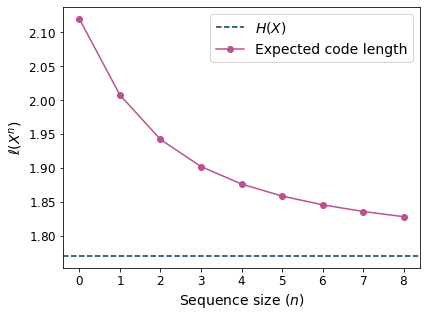

In [46]:
plt.axhline(y=entropy(probabilities), linestyle='dashed', color=colors[0], label=r'$H(X)$')
plt.plot(expected_code_lengths_n, 'o-', color=colors[2], label=r"Expected code length")
plt.xlabel(r"Sequence size ($n$)")
plt.ylabel("$\ell(X^n)$")
plt.legend()
plt.savefig("../figures/monograph/approach-to-entropy.pdf")
plt.show()

## Strong AEP

In [47]:
p = 0.8

In [48]:
P = np.array([[0, 0, 0, 1],
              [0, 0, 1-p, p],
              [0, 1-p, p, 0],
              [1-p, p, 0, 0]])

In [49]:
pi = np.array([1-p/(4-p), 1/(4-p),  1/(4-p),  1/(4-p)])

In [50]:
def entropy_rate(P, pi):
    nrows, ncols = P.shape
    entropy_rate = 0.0
    for i in range(nrows):
        for j in range(ncols):
            if P[i, j] > 0:
                entropy_rate += - pi[i]*P[i, j]*np.log2(P[i, j])
    return entropy_rate

In [51]:
entropy_rate(P, pi)

0.6768075889569021

**Update function**

In [52]:
def update_function(i, u, transition_matrix=P):
    state = np.digitize(u, transition_matrix.cumsum(axis=1)[i, :]).item()
    return state    

**Initialization function**

In [53]:
def init_function(u, distribution=pi):
    state = np.digitize(u, distribution.cumsum(axis=0))
    return state

**Simulation**

In [54]:
def simulate(unif_sample, update_function, init_function):
    n_iter = unif_sample.shape[0] 
    chain = np.zeros(n_iter, dtype=np.int32) 
    chain[0] = init_function(unif_sample[0])
    for i in range(1, n_iter):
        state = update_function(chain[i-1], unif_sample[i])
        chain[i] = state
    return chain        

In [55]:
u = np.random.random(size=10000)

In [56]:
x_n = simulate(u, update_function, init_function)

In [57]:
transitions = np.c_[np.roll(x_n, shift=1).reshape(-1,1),x_n.reshape(-1,1)][1:]

In [58]:
def entropy_rate_estimate(chain_sample, P, pi):
    n = chain_sample.size
    transitions = np.c_[np.roll(chain_sample, shift=1).reshape(-1,1), chain_sample.reshape(-1,1)][1:]
    initial_state = chain_sample[0]
    log_prob = np.log2(pi[initial_state])
    for t in transitions:
        log_prob += np.log2(P[t[0], t[1]])
    return -log_prob/n

In [59]:
entropy_rate_estimate(x_n, P, pi)

0.6758446020034881

#### Histogram

In [60]:
n = 10**3

In [61]:
epsilon = 0.05

In [62]:
n_runs = 500
unif_samples = [np.random.random(size=n) for i in range(n_runs)]
entropy_rates = [entropy_rate_estimate(simulate(sample, update_function, init_function), P, pi) for sample in unif_samples]

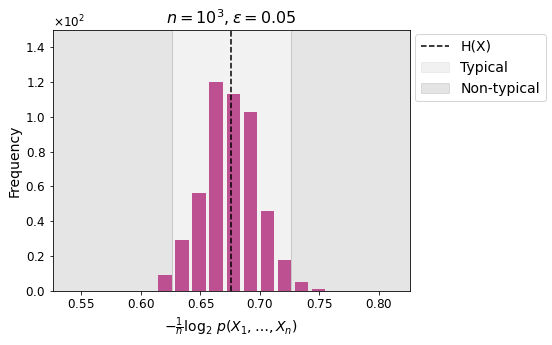

In [63]:
plt.hist(entropy_rates, bins=10, rwidth=0.8, color=colors[2])
plt.axvline(x=entropy_rate_estimate(x_n, P, pi), color='k', linestyle='dashed', label='H(X)')
plt.xlim(entropy_rate_estimate(x_n, P, pi)-0.15,entropy_rate_estimate(x_n, P, pi)+0.15)
plt.xlabel(r"$-\frac{1}{n}\log_{2}\,\,p(X_1, \dots, X_n)$")
plt.ylabel("Frequency")
plt.ylim(0, 150)
plt.title(r"$n = 10^3, \varepsilon = 0.05$")
ax = plt.gca()
ax.fill_between(np.linspace(entropy_rate_estimate(x_n, P, pi)-epsilon, entropy_rate_estimate(x_n, P, pi)+epsilon), 0, 150, color='grey', alpha=0.1, label="Typical")
ax.fill_between(np.linspace(entropy_rate_estimate(x_n, P, pi)+epsilon, entropy_rate_estimate(x_n, P, pi)+0.15), 0, 150, color='black', alpha=0.1)
ax.fill_between(np.linspace(entropy_rate_estimate(x_n, P, pi)-0.15, entropy_rate_estimate(x_n, P, pi)-epsilon), 0, 150, color='black', alpha=0.1, label="Non-typical")
plt.legend(bbox_to_anchor=(1.4, 1.01))
plt.savefig("../figures/monograph/typicality-strong-n1000.pdf", bbox_inches='tight')
plt.show()

In [64]:
n = 5*10**3

In [65]:
epsilon = 0.05

In [66]:
n_runs = 500
unif_samples = [np.random.random(size=n) for i in range(n_runs)]
entropy_rates = [entropy_rate_estimate(simulate(sample, update_function, init_function), P, pi) for sample in unif_samples]

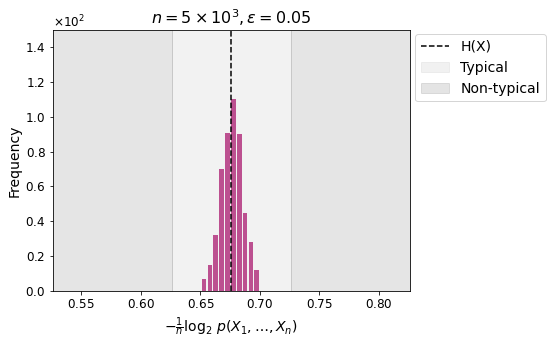

In [67]:
plt.hist(entropy_rates, bins=10, rwidth=0.8, color=colors[2])
plt.axvline(x=entropy_rate_estimate(x_n, P, pi), color='k', linestyle='dashed', label='H(X)')
plt.xlim(entropy_rate_estimate(x_n, P, pi)-0.15,entropy_rate_estimate(x_n, P, pi)+0.15)
plt.xlabel(r"$-\frac{1}{n}\log_{2}\,\,p(X_1, \dots, X_n)$")
plt.ylabel("Frequency")
plt.ylim(0, 150)
plt.title(r"$n = 5\times 10^3, \varepsilon = 0.05$")
ax = plt.gca()
ax.fill_between(np.linspace(entropy_rate_estimate(x_n, P, pi)-epsilon, entropy_rate_estimate(x_n, P, pi)+epsilon), 0, 150, color='grey', alpha=0.1, label="Typical")
ax.fill_between(np.linspace(entropy_rate_estimate(x_n, P, pi)+epsilon, entropy_rate_estimate(x_n, P, pi)+0.15), 0, 150, color='black', alpha=0.1)
ax.fill_between(np.linspace(entropy_rate_estimate(x_n, P, pi)-0.15, entropy_rate_estimate(x_n, P, pi)-epsilon), 0, 150, color='black', alpha=0.1, label="Non-typical")
plt.legend(bbox_to_anchor=(1.4, 1.01))
plt.savefig("../figures/monograph/typicality-strong-n5times1000.pdf", bbox_inches='tight')
plt.show()